<a href="https://colab.research.google.com/github/xCocco0/alzheimer-recognition/blob/main/alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
This is the description of the project.

---
### Import modules

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Load data

In [127]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/oasis3-normalized.csv")

### Overview of data

In [128]:
print("--- Overview ---\n",df.describe())

print("\n--- Correlation ---\n",df[["mmse",'cdr','age','weight','height','eTIV','brainVol','nWBV','ventricleVol','ventricleRatio','hcVol','hcRatio']].corr())

--- Overview ---
               sex         age       height      weight   education  \
count  893.000000  893.000000   893.000000  893.000000  893.000000   
mean     0.456887   68.653975  1675.709966   77.471445   15.614782   
std      0.498417    8.858256    97.005027   17.042696    2.766205   
min      0.000000   42.000000  1295.000000   37.000000    0.000000   
25%      0.000000   64.000000  1600.000000   65.000000   13.000000   
50%      0.000000   69.000000  1676.000000   76.000000   16.000000   
75%      1.000000   74.000000  1753.000000   87.000000   18.000000   
max      1.000000   94.000000  2007.000000  148.000000   24.000000   

             hand        mmse         cdr          eTIV      brainVol  \
count  893.000000  893.000000  893.000000  8.930000e+02  8.930000e+02   
mean     0.931691   27.638298    0.221725  1.505546e+06  8.827183e+05   
std      0.322604    3.579991    0.396309  1.846496e+05  1.082714e+05   
min      0.000000    4.000000    0.000000  1.000078e+06  6.

### Visualise data

In [129]:
# for conversion
index2color = {0:'#64C4E480', 1:'#FFA000A0', 2:'#FF7000A0', 3:'#FF0000A0'}
index2label = {0:'Non demented', 1:'Very mild dementia', 2:'Mild dementia', 3:'Moderate dementia'}
index2cdr = {0:0.0, 1:0.5, 2:1.0, 3:2.0}
cdr2index = {0.0:0, 0.5:1, 1.0:2, 2.0:3}

### Distribution plots

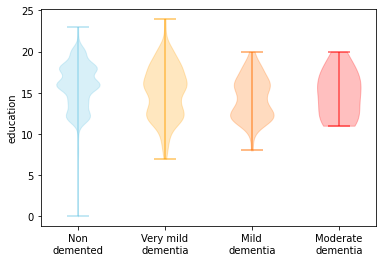

In [130]:
fig, ax = plt.subplots()

index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['education'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(index2color[index])
  parts['cbars'].set_color(index2color[index])
  parts['cmins'].set_color(index2color[index])
  parts['cmaxes'].set_color(index2color[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('education')
plt.show()

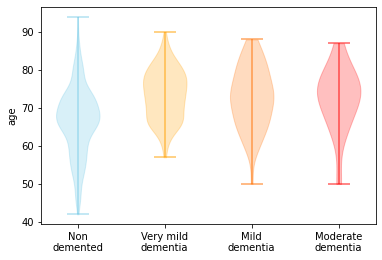

In [131]:
fig, ax = plt.subplots()

index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['age'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(index2color[index])
  parts['cbars'].set_color(index2color[index])
  parts['cmins'].set_color(index2color[index])
  parts['cmaxes'].set_color(index2color[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('age')
plt.show()

### Correlation plots

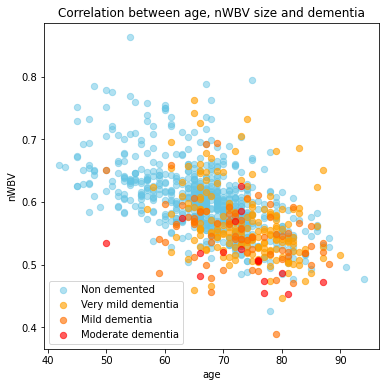

In [135]:
def corr_plot(x,y,title=f"Correlation between {x}, {y} size and dementia",labelx=x,labely=y,dotsize=40):
  fig, ax = plt.subplots(figsize=(6, 6))
  for i in range(0,4):
    ax.scatter(df[df.cdr == index2cdr[i]][x],
              df[df.cdr == index2cdr[i]][y],
              c = index2color[i],
              label = index2label[i], s = dotsize)
  ax.legend()
  ax.set_title(f"Correlation between {x}, {y} size and dementia")
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()
  
corr_plot('age','nWBV',
          "Correlation between Brain Volume / Age and dementia",'Age (years)','nWBV')

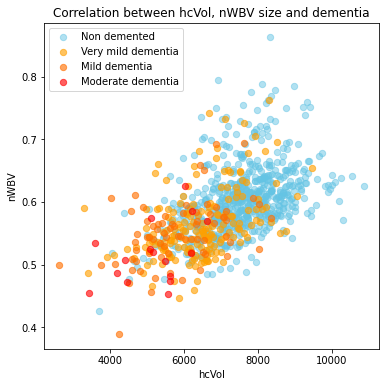

In [137]:
corr_plot('hcVol','nWBV',
          "Correlation between nWBV, hippocampus size and dementia",'hcVol (mm\u00B3)','nWBV')

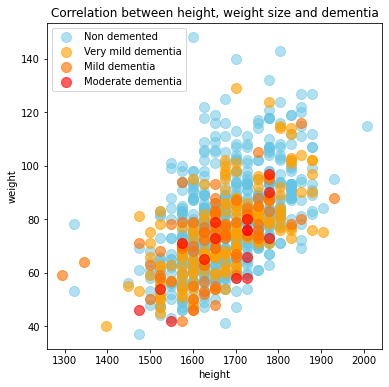

In [138]:
corr_plot('height','weight',
          'Correlation between Height/Weight and dementia','Height (mm)','Weight (kg)',100)

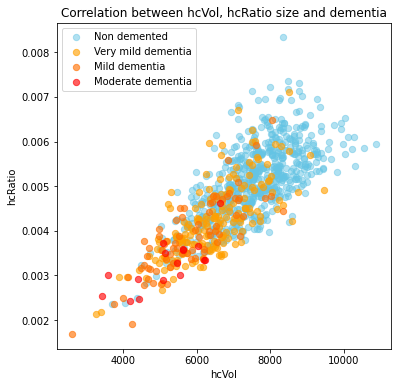

In [190]:
#@title Customise your plot
x = "hcVol" #@param ["age", "height", "weight", "eTIV", "brainVol", "nWBV", "ventricleVol", "ventricleRatio", "hcVol", "hcRatio"]
y = "hcRatio" #@param ["age", "height", "weight", "eTIV", "brainVol", "nWBV", "ventricleVol", "ventricleRatio", "hcVol", "hcRatio"]

corr_plot(x,y)

### Frequency plots

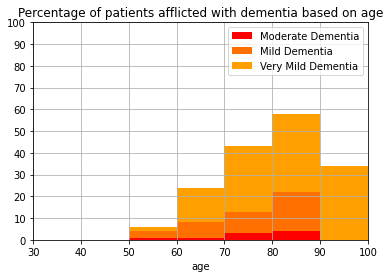

In [183]:
def hist_plot(label, delta, numbars, xmin = 0, xmax = None, df = df):
  if xmax == None:
    xmax = delta*numbars
  hist = np.zeros((numbars,5))
  hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

  for index, row in df.iterrows():
    groupindex = int(row[label]/delta)
    if groupindex < numbars:
      hist[groupindex, cdr2index[row["cdr"]]+1] += 1
      hist[groupindex, 0] += 1
  #print(hist)
  for row in hist:
    for i in range(1,5):
      if row[0] == 0:
        row[i] = 0
      else:
        row[i] = np.ceil(100 * row[i] / row[0])
  #print(hist)

  fig, ax = plt.subplots()
  ax.bar(hist_labels, hist[:,4], width = delta, color = "#FF0000", label = "Moderate Dementia")
  ax.bar(hist_labels, hist[:,3], width = delta, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
  ax.bar(hist_labels, hist[:,2], width = delta, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
  #ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")

  ax.set_title("Percentage of patients afflicted with dementia based on age")
  ax.set_ylim(0,100)
  ax.set_xlim(xmin,xmax)
  ax.set_xticks(np.arange(xmin,min(xmax,delta*numbars)+delta/2,delta))
  ax.set_yticks(range(0,101,10))
  ax.grid()
  ax.set_xlabel(label)
  ax.legend()
  plt.show()

hist_plot("age", 10, 10, xmin = 30)

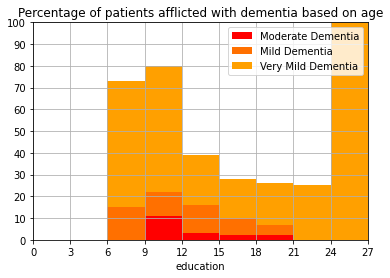

In [184]:
hist_plot("education", 3, 9, xmax = 27)

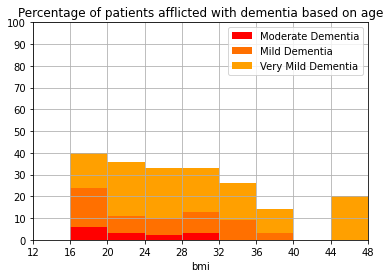

In [185]:
dfbmi = df.loc[:,["height","weight","cdr"]]
dfbmi["bmi"] = (1000000*df["weight"])/(df["height"]**2)

hist_plot("bmi", 4, 20, xmin = 12, xmax = 48, df = dfbmi)

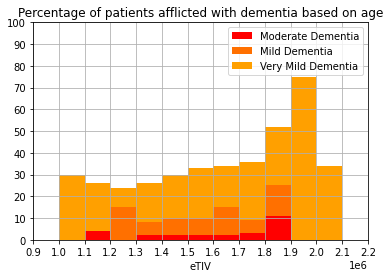

In [200]:
#@title Customise your plot
label = 'eTIV' #@param ["age", "height", "weight", "eTIV", "brainVol", "nWBV", "ventricleVol", "ventricleRatio", "hcVol", "hcRatio"]
delta =  100000#@param {type:"number"}
numbars =  22#@param {type:"integer"}
xmin =  900000#@param {type:"integer"}
xmax = None #@param {type:"raw"}

hist_plot(label, delta, numbars, xmin = xmin, xmax = xmax)

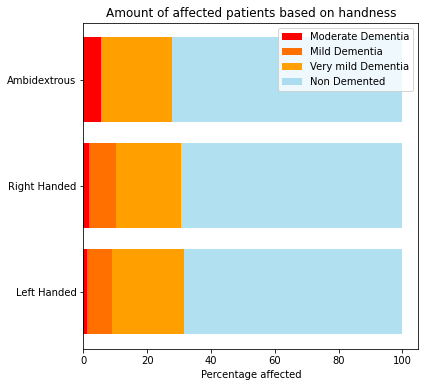

In [201]:
fig, ax = plt.subplots(figsize=(6,6))
bars = np.empty((4,3))

for i in range(0,4):
  for j in range(0,3):
    bars[i,j] = df[(df.hand == j) & (df.cdr == index2cdr[i])].loc[:,"id"].count()
#print(handness)
for i in range(0,3):
  bars[:,i] /= np.sum(bars[:,i])
bars = (bars*100)
#print(bars)
colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
ax.barh([1,2,3], bars[3,:], color = "#FF0000", label = "Moderate Dementia")
ax.barh([1,2,3], bars[2,:], left = bars[3,:], color = "#FF7000", label = "Mild Dementia")
ax.barh([1,2,3], bars[1,:], left = bars[3,:]+bars[2,:], color = "#FFA000", label = "Very mild Dementia")
ax.barh([1,2,3], bars[0,:], left = bars[3,:]+bars[2,:]+bars[1,:], color = "#64C4E480", label = "Non Demented")
ax.set_yticks([1,2,3])
ax.set_yticklabels(['Left Handed','Right Handed','Ambidextrous'])
ax.set_xlabel("Percentage affected")
ax.set_title("Amount of affected patients based on handness")
ax.legend()
plt.show()

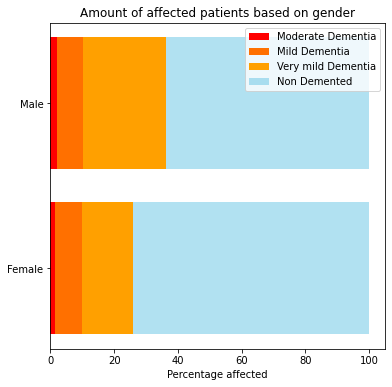

In [202]:
fig, ax = plt.subplots(figsize=(6,6))
bars = np.empty((4,2))

for i in range(0,4):
  for j in range(0,2):
    bars[i,j] = df[(df.sex == j) & (df.cdr == index2cdr[i])].loc[:,"id"].count()
#print(bars)
for i in range(0,2):
  bars[:,i] /= np.sum(bars[:,i])
bars = (bars*100)
#print(bars)
colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
ax.barh([1,2], bars[3,:], color = "#FF0000", label = "Moderate Dementia")
ax.barh([1,2], bars[2,:], left = bars[3,:], color = "#FF7000", label = "Mild Dementia")
ax.barh([1,2], bars[1,:], left = bars[3,:]+bars[2,:], color = "#FFA000", label = "Very mild Dementia")
ax.barh([1,2], bars[0,:], left = bars[3,:]+bars[2,:]+bars[1,:], color = "#64C4E480", label = "Non Demented")
ax.set_yticks([1,2])
ax.set_yticklabels(['Female','Male'])
ax.set_xlabel("Percentage affected")
ax.set_title("Amount of affected patients based on gender")
ax.legend()
plt.show()

---
# Training

In [203]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm
import sklearn.metrics
import sklearn.preprocessing
import sklearn.calibration

#X = df[["age","sex","height","weight","hand","education","nWBV","ventricleRatio","hcRatio"]].to_numpy(dtype = float)
X = df[["age","weight","education","eTIV","brainVol","ventricleVol","hcVol"]].to_numpy(dtype = float)
#X = df[["mmse","education","nWBV"]].to_numpy(dtype = float)
y = np.ravel(df[["cdr"]].to_numpy(dtype = float))

#y = np.where(y > 0, 1, 0)
le = sklearn.preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 4)
#print(X_train, X_test, y_train, y_test)

score_matrix = np.array(
    [[100,  0,  0,  0],
     [ 20,100, 10,  5],
     [ 10, 40,100, 10],
     [  0, 20, 50,100]]
)
print(score_matrix)
def score(y,y_pred):
  n = len(y)
  sc = 0
  for i in range(n):
    sc += score_matrix[y[i],y_pred[i]]
  return sc

myscorer = sklearn.metrics.make_scorer(score)

#print(X_train[:100,:])
clf = sklearn.linear_model.LogisticRegressionCV(
    max_iter = 9999,
    class_weight = {0:1,1:1.5,2:2,3:4},
    scoring = myscorer,
    )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print(y_pred)
# print(y_test)
print(sklearn.metrics.confusion_matrix(y_test,y_pred))
print("Base score: ", sklearn.metrics.accuracy_score(y_test,y_pred))
print("Adjusted score: ", np.sum(score(y_test,y_pred)/(100*len(y_test))))

[[100   0   0   0]
 [ 20 100  10   5]
 [ 10  40 100  10]
 [  0  20  50 100]]
[[107  16   0   1]
 [ 21  12   3   1]
 [  7   3   4   1]
 [  1   0   1   1]]
Base score:  0.6927374301675978
Adjusted score:  0.732122905027933


In [204]:
np.set_printoptions(suppress=True)
dx = np.empty(6)
### TODO: AGGIUSTARE QUESTO SCHIFO ###
print("Overstimates")
print("    age ","weight ","education ","eTIV ","brainVol ","ventricleVol ","hcVol ")
for i in range(len(y_pred)):
  if(y_test[i] < y_pred[i]):
    dx = np.ravel(df.loc[:,["mmse","dx1","dx2","dx3","dx4","dx5"]][df.eTIV == X_test[i,3]]
                  .head(1).fillna('').to_numpy(dtype = str))
    print(X_test[i,:])
    print(f"Predicted: {y_test[i]}, was: {y_pred[i]}")
    print("MMSE: ", dx[0], "Diseases: ", ", ".join(dx[1:5]))
    print("----------------------------------------------------------------------------------")

for i in range(len(y_pred)):
  if(y_test[i] > y_pred[i]):
    dx = np.ravel(df.loc[:,["mmse","dx1","dx2","dx3","dx4","dx5"]][df.eTIV == X_test[i,3]]
                  .head(1).fillna('').to_numpy(dtype = str))
    print(X_test[i,:])
    print(f"Predicted: {y_test[i]}, was: {y_pred[i]}")
    print("MMSE: ", dx[0], "Diseases: ", ", ".join(dx[1:5]))
    print("----------------------------------------------------------------------------------")

Overstimates
    age  weight  education  eTIV  brainVol  ventricleVol  hcVol 
[     74.      44.      18. 1318646.  667096.   61431.    5062.]
Predicted: 0, was: 1
MMSE:  29 Diseases:  Cognitively normal, , , 
----------------------------------------------------------------------------------
[     66.     103.      18. 1792568.  996020.   48762.    5962.]
Predicted: 1, was: 2
MMSE:  30 Diseases:  Unc: ques. Impairment, Active Mood disorder, Active Alcoholism, Active Other neurol/med diagnoses
----------------------------------------------------------------------------------
[     68.      83.      16. 1495784.  696832.   49271.    5119.]
Predicted: 1, was: 2
MMSE:  27 Diseases:  AD Dementia, , , 
----------------------------------------------------------------------------------
[     71.      98.      18. 1798161.  956864.   74359.    6720.]
Predicted: 0, was: 1
MMSE:  28 Diseases:  Cognitively normal, , , 
-------------------------------------------------------------------------------

# References
- https://www.oasis-brains.org/
- https://www.oasis-brains.org/files/OASIS-3_Imaging_Data_Dictionary_v1.5.pdf
- https://surfer.nmr.mgh.harvard.edu/fswiki/MorphometryStats
- http://www.ajnr.org/content/22/8/1483
- https://jamanetwork.com/journals/jamaneurology/fullarticle/775393
- http://perspectivesinmedicine.cshlp.org/content/2/4/a006213.long
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5390933/
- https://link.springer.com/article/10.1007/s00415-008-0750-9